In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Pacific_Extent = pd.read_excel(filepath, sheet_name='Pacific-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Pacific_Extent)
fp.date_time(Pacific_Extent)

,Extent,Date
0,668714.275,1979-01-01
1,566930.458,1979-02-01
2,688420.115,1979-03-01
3,859963.043,1979-04-01
4,1127120.160,1979-05-01
...,...,...
533,1134056.102,2023-06-01
534,1484824.377,2023-07-01
535,1671324.717,2023-08-01
536,1726376.097,2023-09-01


In [5]:
scaler = MinMaxScaler()
Pacific_Extent['Extent'] = scaler.fit_transform(Pacific_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 10
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Pacific_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((517, 12, 1), (517,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Pacific_model_LT10/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
46/53 [=========================>....] - ETA: 0s - loss: 0.3201 - root_mean_squared_error: 0.5658

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 6s 78ms/step - loss: 0.3116 - root_mean_squared_error: 0.5582 - val_loss: 0.2357 - val_root_mean_squared_error: 0.4854
Epoch 2/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1761 - root_mean_squared_error: 0.4197

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.1770 - root_mean_squared_error: 0.4207 - val_loss: 0.1870 - val_root_mean_squared_error: 0.4324
Epoch 3/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1403 - root_mean_squared_error: 0.3745

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.1363 - root_mean_squared_error: 0.3692 - val_loss: 0.1552 - val_root_mean_squared_error: 0.3940
Epoch 4/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1101 - root_mean_squared_error: 0.3318

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.1084 - root_mean_squared_error: 0.3292 - val_loss: 0.1294 - val_root_mean_squared_error: 0.3597
Epoch 5/50
52/53 [============================>.] - ETA: 0s - loss: 0.0853 - root_mean_squared_error: 0.2921

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0850 - root_mean_squared_error: 0.2916 - val_loss: 0.1077 - val_root_mean_squared_error: 0.3282
Epoch 6/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0676 - root_mean_squared_error: 0.2601

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0668 - root_mean_squared_error: 0.2584 - val_loss: 0.0875 - val_root_mean_squared_error: 0.2958
Epoch 7/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0528 - root_mean_squared_error: 0.2298

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0514 - root_mean_squared_error: 0.2268 - val_loss: 0.0749 - val_root_mean_squared_error: 0.2736
Epoch 8/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0382 - root_mean_squared_error: 0.1954

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0363 - root_mean_squared_error: 0.1906 - val_loss: 0.0612 - val_root_mean_squared_error: 0.2474
Epoch 9/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0290 - root_mean_squared_error: 0.1704

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0293 - root_mean_squared_error: 0.1713 - val_loss: 0.0410 - val_root_mean_squared_error: 0.2024
Epoch 10/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0215 - root_mean_squared_error: 0.1468

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0220 - root_mean_squared_error: 0.1485 - val_loss: 0.0318 - val_root_mean_squared_error: 0.1784
Epoch 11/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0193 - root_mean_squared_error: 0.1389

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0199 - root_mean_squared_error: 0.1411 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1501
Epoch 12/50
42/53 [======================>.......] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.1358

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0168 - root_mean_squared_error: 0.1297 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1361
Epoch 13/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0148 - root_mean_squared_error: 0.1218

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.0147 - root_mean_squared_error: 0.1210 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0988
Epoch 14/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0123 - root_mean_squared_error: 0.1110

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0118 - root_mean_squared_error: 0.1086 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0958
Epoch 15/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.1159

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0139 - root_mean_squared_error: 0.1180 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0855
Epoch 16/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1119

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0686
Epoch 17/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0118 - root_mean_squared_error: 0.1088 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0877
Epoch 18/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0128 - root_mean_squared_error: 0.1133 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0806
Epoch 19/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0120 - root_mean_squared_error: 0.1096

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0119 - root_mean_squared_error: 0.1090 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0685
Epoch 20/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1035

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0106 - root_mean_squared_error: 0.1030 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0657
Epoch 21/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0110 - root_mean_squared_error: 0.1049 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0732
Epoch 22/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0115 - root_mean_squared_error: 0.1072 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0659
Epoch 23/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0111 - root_mean_squared_error: 0.1054 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0663
Epoch 24/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0125 - root_mean_squared_error: 0.1119 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0674
Epoch 25/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0132 - root_mean_squared_error: 0.1149 - val_loss: 0.0062 - val_root_mean_squared

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0121 - root_mean_squared_error: 0.1100 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0655
Epoch 31/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0099 - root_mean_squared_error: 0.0996 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0785
Epoch 32/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0099 - root_mean_squared_error: 0.0995 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0804
Epoch 33/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0128 - root_mean_squared_error: 0.1133 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0718
Epoch 34/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0088 - root_mean_squared_error: 0.0938 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0751
Epoch 35/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1033

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0106 - root_mean_squared_error: 0.1029 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0648
Epoch 36/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0100 - root_mean_squared_error: 0.1000 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0667
Epoch 37/50
52/53 [============================>.] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1130

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0639
Epoch 38/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0101 - root_mean_squared_error: 0.1005 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0666
Epoch 39/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0110 - root_mean_squared_error: 0.1051 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0898
Epoch 40/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0088 - root_mean_squared_error: 0.0938 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0641
Epoch 41/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0102 - root_mean_squared_error: 0.1010 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0825
Epoch 42/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1033

INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


INFO:tensorflow:Assets written to: Pacific_model_LT10\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0109 - root_mean_squared_error: 0.1046 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0622
Epoch 43/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0112 - root_mean_squared_error: 0.1059 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709
Epoch 44/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0143 - root_mean_squared_error: 0.1196 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0631
Epoch 45/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0779
Epoch 46/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0112 - root_mean_squared_error: 0.1057 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0669
Epoch 47/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082 - val_loss: 0.0049 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.4944579402605693 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

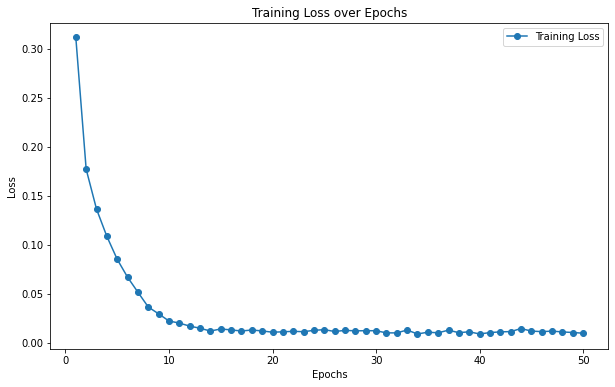

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

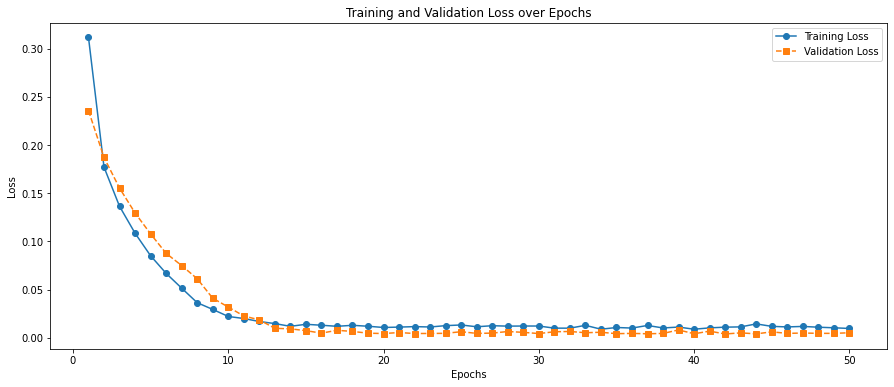

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Pacific_model_LT10/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.07053123684592345
MAE : 0.05680655063852776


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,3.978589e+05,460009.672
1,5.185003e+05,610848.036
2,7.965418e+05,819257.445
3,1.078630e+06,1129627.707
4,1.466095e+06,1463383.236
5,1.642640e+06,1614536.727
6,1.947234e+06,1862498.612
7,2.009298e+06,2099349.296
8,1.822351e+06,1981614.046
9,1.358330e+06,1433022.369


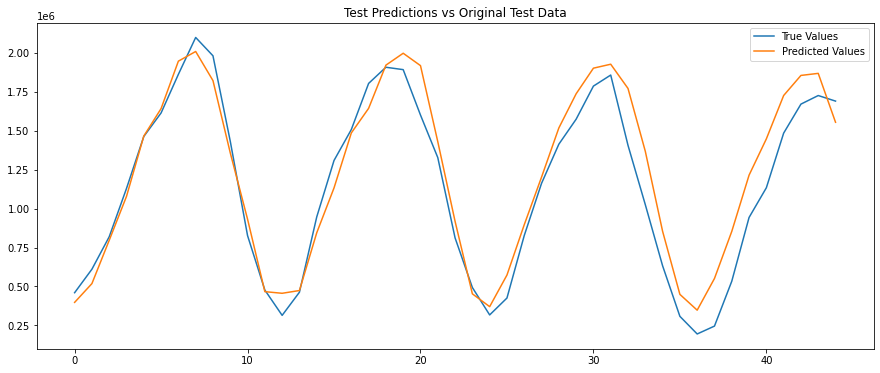

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

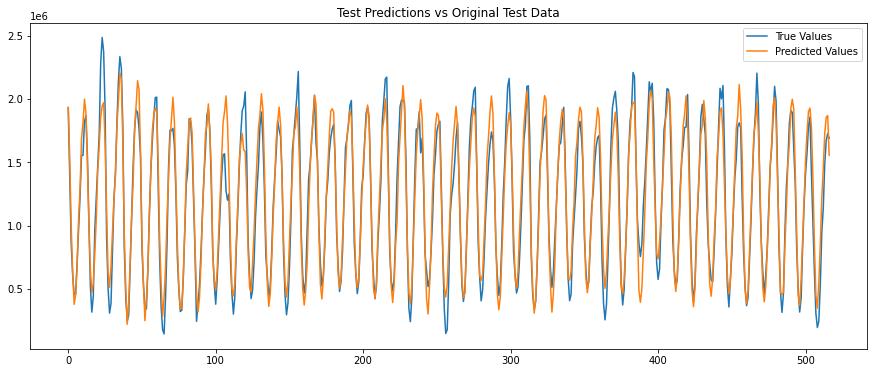

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()